This jupyter notebook will help us in creating graphs and charts for our results. It will have basic functionality to calculate speedup and efficiency

In [92]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [2]:
# loop through a list of threaded results and compare to sequential execution to find a df of threads, avg, sppedup, and efficiency
def calc_speedup(seq_list, thread_lists):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  print('Sequential Execution time average: ', seqAvg)

  num_of_threads = 0
  results = []
  result_names = ['Threads', 'STD', 'Avg', 'Speedup', 'Efficiency']

  for thread_list in thread_lists:
    # Remove max and min for current list
    thread_list.remove(max(thread_list))
    thread_list.remove(min(thread_list))

    num_of_threads += 1
    thread_avg = round(np.average(thread_list), 3)
    speedup = round(seqAvg/thread_avg, 3)
    efficiency = round(speedup/num_of_threads, 3)
    standard_dev = round(np.std(thread_list), 5)
    results.append([num_of_threads, standard_dev, thread_avg, speedup, efficiency])

  df = pandas.DataFrame(results, columns=result_names)  
  return df

In [3]:
# Will take a dataframe with Avg, Speedup, and Efficiency and plot them
def plot_speedup(df):
  ax = plt.gca() 
  df.plot(kind = 'line', x = 'Threads', y = 'Avg', color = 'green', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'orange', ax = ax)
  plt.show();

In [4]:
# Will take a list of sequential results and return the average of the list
def avg(seq_list):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  return seqAvg

In [ ]:
# read in ISD.txt file and plot the data (not doing anything with this info, just good to see that it's working)
isd = pandas.read_csv('ISD.txt', sep = '\t')
isd.columns = ['STEP', 'ISD']
isd.plot(x = 'STEP', y = 'ISD')
plt.show()

In [132]:
# Initial sequential results for the 3 dataset sizes

small_seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
med_seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
large_seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]

small_seq_avg = avg(small_seq)
med_seq_avg = avg(med_seq)
large_seq_avg = avg(large_seq)

avg(small_seq), avg(med_seq), avg(large_seq)

(0.5418229999999999, 9.448180333333333, 64.39854033333334)

In [133]:
# small ds results for nmfOpt
small_opt_seq = [0.534458, 0.539122, 0.537426, 0.535542, 0.532333, 0.543207, 0.542756]
print(avg(small_opt_seq))

# medium ds results for nmfOpt 
medium_opt_seq = [9.441730, 9.391151, 9.424263, 9.313599, 9.268967, 9.493464, 9.293930]
print(avg(medium_opt_seq))

# large ds results for nmfOpt
large_opt_seq = [60.663204, 60.128183, 63.347251, 60.117393, 60.801112, 60.199751, 60.442872]
print(avg(large_opt_seq))

small_opt_avg = avg(small_opt_seq)
med_opt_avg = avg(medium_opt_seq)
large_opt_avg = avg(large_opt_seq)


0.5378608
9.372934599999999
60.4470244


In [134]:
# small ds results for nmfPar single thread
small_par_seq = [0.470728, 0.471504, 0.473588, 0.471908, 0.467761, 0.470053, 0.467716]
print(avg(small_par_seq))

# medium ds results for nmfPar
med_par_seq = [8.642702, 8.695253, 8.738631, 8.654536, 8.599834, 8.756375, 8.614154]
print(avg(med_par_seq))

# large ds results for nmfPar
large_par_seq = [57.357558, 56.555895, 57.028260, 56.709666, 56.450673, 58.547720, 56.940393]
print(avg(large_par_seq))

small_par_avg = avg(small_par_seq)
med_par_avg = avg(med_par_seq)
large_par_avg = avg(large_par_seq)


0.4703908
8.669055199999999
56.9183544


In [135]:
# small ds results for nmfOptPar single thread
small_optpar_seq = [0.469160, 0.471823, 0.472777, 0.467738, 0.469316, 0.467234, 0.468428]
print(avg(small_optpar_seq))

# medium ds results for nmfOptPar
medium_optpar_seq = [8.542161, 8.505201, 8.534559, 8.552818, 8.550202, 8.571109, 8.492260]
print(avg(medium_optpar_seq))

# large ds results for nmfOptPar
large_optpar_seq = [56.875965, 56.002056, 56.185717, 58.565504, 56.160694, 56.276474, 55.989041]
print(avg(large_optpar_seq))

small_optpar_avg = avg(small_optpar_seq)
med_optpar_avg = avg(medium_optpar_seq)
large_optpar_avg = avg(large_optpar_seq)


0.46929299999999996
8.5369882
56.3001812


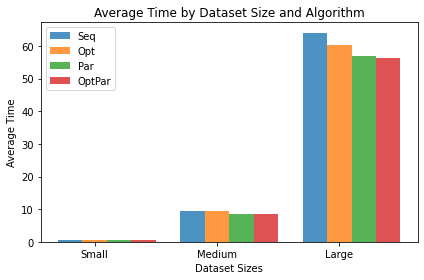

In [138]:
# Plot all the avg results for seq, opt, par, and optpar together using the average results from above
average_times = {
    'Seq': {'Small': small_seq_avg, 'Medium': med_seq_avg, 'Large': large_seq_avg},
    'Opt': {'Small': small_opt_avg, 'Medium': med_opt_avg, 'Large': large_opt_avg},
    'Par': {'Small': small_par_avg, 'Medium': med_par_avg, 'Large': large_par_avg},
    'OptPar': {'Small': small_optpar_avg, 'Medium': med_optpar_avg, 'Large': large_optpar_avg},
}

dataset_sizes = ['Small', 'Medium', 'Large']

bar_width = 0.2
opacity = 0.8

index = np.arange(len(dataset_sizes))

for i, (algo, times) in enumerate(average_times.items()):
    plt.bar(index + i * bar_width, times.values(), bar_width,
            alpha=opacity, label=algo)

plt.xlabel('Dataset Sizes')
plt.ylabel('Average Time')
plt.title('Average Time by Dataset Size and Algorithm')
plt.xticks(index + bar_width, dataset_sizes)
plt.legend()

plt.tight_layout()
plt.show()

0.5419072 0.552068 0.5425760000000001 0.5380942 0.5385568 0.5399655999999999 0.5474943999999999 0.5349756000000001 0.5357484 0.5321187999999999 0.5412319999999999


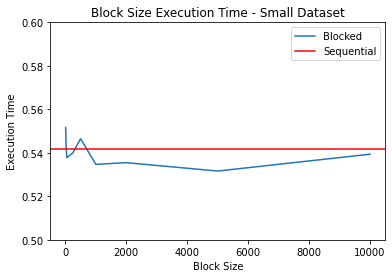

In [110]:
# small ds results for nmfOpt - blocking
seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
par10 = [0.550422, 0.550338, 0.547757, 0.556342, 0.548995, 0.558231, 0.554243]
par25 = [0.539496, 0.547106, 0.546138, 0.540328, 0.544313, 0.535382, 0.542605]
par50 = [0.541280, 0.538336, 0.536130, 0.545493, 0.538739, 0.535981, 0.535986]
par100 = [0.546231, 0.530213, 0.543186, 0.534009, 0.534886, 0.543913, 0.536790]
par250 = [0.554449, 0.536993, 0.531711, 0.539495, 0.533229, 0.543633, 0.546478]
par500 = [0.540102, 0.532589, 0.537161, 0.541972, 0.567119, 0.560839, 0.557398]
par1000 = [0.534457, 0.535191, 0.532827, 0.537962, 0.534441, 0.539641, 0.531159]
par2000 = [0.536564, 0.539811, 0.534647, 0.537961, 0.533593, 0.534342, 0.535228]
par5000 = [0.530662, 0.535121, 0.535085, 0.530814, 0.531821, 0.529611, 0.532212]
par10000 = [0.537150, 0.534218, 0.536364, 0.533799, 0.544581, 0.553847, 0.563479]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]

# add a constant line with the sequential execution time to the plot
plt.ylim(.5, .6)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Small Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()

9.4422076 9.540960799999999 9.378895600000002 9.391796 9.3637678 9.3725704 9.347297000000001 9.438360800000002 9.458645 9.3526032 9.450391


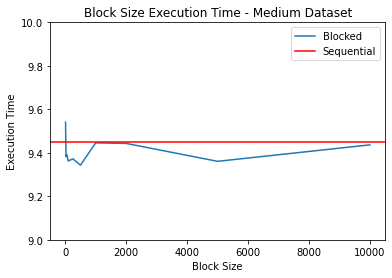

In [111]:
# medium ds results for nmfOpt - blocking
seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
par10 = [9.450070, 9.591811, 9.599302, 9.527902, 12.228987, 9.482738, 9.503051]
par25 = [9.486993, 9.320670, 9.428383, 9.419038, 9.318298, 9.408089, 9.269470]
par50 = [9.433731, 9.561377, 9.322494, 9.361047, 9.436499, 9.348331, 9.379372]
par100 = [9.460760, 9.281239, 9.436277, 9.313866, 9.336958, 9.437411, 9.294327]
par250 = [9.353697, 9.593345, 9.336391, 9.409245, 9.358116, 9.311966, 9.405403]
par500 = [9.436719, 9.219187, 9.301371, 9.387757, 9.340876, 9.539863, 9.269762]
par1000 = [9.380692, 9.473661, 9.434264, 9.338804, 9.456218, 9.621502, 9.446969]
par2000 = [9.584038, 9.379365, 9.608558, 9.449350, 9.333862, 9.474474, 9.405998]
par5000 = [9.396626, 9.283757, 9.275909, 9.497640, 9.343070, 9.375007, 9.364556]
par10000 = [9.300772, 9.455358, 9.615612, 9.444692, 9.546060, 9.396048, 9.409797]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]

# set y axis to start at 0 and end at 1
plt.ylim(9, 10)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Medium Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()

64.0224332 60.8154756 62.229225 60.5727032 60.540280800000005 60.517412 60.9396588 61.2019142 62.127784000000005 60.779240400000006 60.6673186


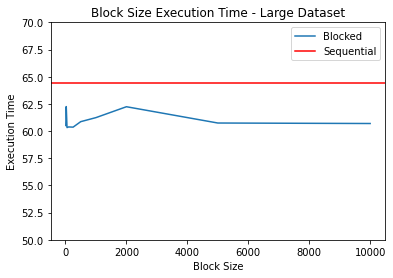

In [112]:
# large ds results for nmfOpt - blocking
seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]
par10 = [60.343254, 60.561474, 60.449829, 62.190076, 60.301975, 60.532745, 62.227841]
par25 = [63.361837, 65.885473, 60.655988, 60.592889, 63.790693, 60.580615, 62.744718]
par50 = [64.132692, 60.386337, 60.141502, 60.161332, 60.417069, 60.083275, 61.757276]
par100 = [60.318428, 60.414053, 60.171394, 61.296319, 61.851624, 60.264112, 60.408492]
par250 = [60.179979, 59.891246, 60.391118, 60.378669, 61.319627, 60.317667, 62.100910]
par500 = [60.314595, 61.117702, 61.756292, 60.340996, 63.036884, 61.125936, 60.357368]
par1000 = [61.227422, 60.354767, 60.306954, 62.765614, 61.834360, 60.654657, 61.938365]
par2000 = [60.613229, 63.260377, 63.451489, 60.436812, 64.865226, 62.845308, 60.468517]
par5000 = [60.095884, 60.554738, 65.304430, 61.575913, 60.762393, 59.960676, 60.907274]
par10000 = [61.029667, 62.605819, 60.816393, 60.217176, 60.193416, 60.315100, 60.958257]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]

# set y axis to start at 0 and end at 1
plt.ylim(50, 70)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Large Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()

In [113]:
from prettytable import PrettyTable

# # Block size tests - really see no joy at all. Too small? Not a localization issue?
# (base) denver:~/CS575/NMF$ ./test.sh 1 10000 ./test_data/med_data.dat 5 0 1 nmf
# 1 threads for nmf -N 6 -I 10000 -T 5 -B 1 ./test_data/med_data.dat
# 9.406589, 9.325238, 9.404208, 9.387634, 9.362653, 9.383552, 9.479898,

# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 10 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 10 ./test_data/med_data.dat
# 9.722706, 9.579972, 9.661539, 9.737212, 9.599060, 9.676715, 9.564941,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 25 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 25 ./test_data/med_data.dat
# 9.432991, 9.493594, 9.463730, 9.553460, 9.448938, 9.493673, 9.498362,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 50 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 50 ./test_data/med_data.dat
# 9.466799, 9.534266, 9.450707, 9.495390, 9.564350, 9.529818, 9.465759,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 100 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 100 ./test_data/med_data.dat
# 9.452977, 9.510970, 9.526947, 9.405941, 9.471033, 9.410863, 9.707120,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 250 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 250 ./test_data/med_data.dat
# 9.408955, 9.560139, 9.436111, 9.338082, 9.544690, 9.416759, 9.575007,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 500 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 9.504865, 9.649893, 9.623651, 9.458090, 9.513319, 9.504950, 9.535742,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 1000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 1000 ./test_data/med_data.dat
# 9.483290, 9.528004, 9.468683, 9.524097, 9.507855, 9.453468, 9.463101,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 2000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 2000 ./test_data/med_data.dat
# 9.462383, 9.553690, 9.712771, 9.667013, 9.557601, 9.412043, 9.534750,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 5000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 5000 ./test_data/med_data.dat
# 9.571613, 9.479653, 9.566766, 9.650081, 9.536227, 9.569641, 9.490401,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 10000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 9.470639, 9.565643, 9.551589, 9.517079, 9.560104, 9.457342, 9.522353,

# create arrays of the data
seq = [9.406589, 9.325238, 9.404208, 9.387634, 9.362653, 9.383552, 9.479898]
par_10 = [9.722706, 9.579972, 9.661539, 9.737212, 9.599060, 9.676715, 9.564941]
par_25 = [9.432991, 9.493594, 9.463730, 9.553460, 9.448938, 9.493673, 9.498362]
par_50 = [9.466799, 9.534266, 9.450707, 9.495390, 9.564350, 9.529818, 9.465759]
par_100 = [9.452977, 9.510970, 9.526947, 9.405941, 9.471033, 9.410863, 9.707120]
par_250 = [9.408955, 9.560139, 9.436111, 9.338082, 9.544690, 9.416759, 9.575007]
par_500 = [9.504865, 9.649893, 9.623651, 9.458090, 9.513319, 9.504950, 9.535742]
par_1000 = [9.483290, 9.528004, 9.468683, 9.524097, 9.507855, 9.453468, 9.463101]
par_2000 = [9.462383, 9.553690, 9.712771, 9.667013, 9.557601, 9.412043, 9.534750]
par_5000 = [9.571613, 9.479653, 9.566766, 9.650081, 9.536227, 9.569641, 9.490401]
par_10000 = [9.470639, 9.565643, 9.551589, 9.517079, 9.560104, 9.457342, 9.522353]

# find the average of each array using the avg method
seq_avg = avg(seq)
par_10_avg = avg(par_10)
par_25_avg = avg(par_25)
par_50_avg = avg(par_50)
par_100_avg = avg(par_100)
par_250_avg = avg(par_250)
par_500_avg = avg(par_500)
par_1000_avg = avg(par_1000)
par_2000_avg = avg(par_2000)
par_5000_avg = avg(par_5000)
par_10000_avg = avg(par_10000)

# create a table for the data with 4 decimal places of precision
table = PrettyTable(['Sequential', '10', '25', '50', '100', '250', '500', '1000', '2000', '5000', '10000'])
table.add_row([round(seq_avg, 4), round(par_10_avg, 4), round(par_25_avg, 4), round(par_50_avg, 4), round(par_100_avg, 4), round(par_250_avg, 4), round(par_500_avg, 4), round(par_1000_avg, 4), round(par_2000_avg, 4), round(par_5000_avg, 4), round(par_10000_avg, 4)])

# print the table
table


Sequential,10,25,50,100,250,500,1000,2000,5000,10000
9.3889,9.648,9.4797,9.4984,9.4746,9.4733,9.5365,9.4894,9.5551,9.5469,9.5244


In [95]:
import math

def calc_mean_and_variance(df):
    df_cols = ['iter_0', 'iter_1', 'iter_2', 'iter_3', 'iter_4', 'iter_5', 'iter_6']
    df_variance_cols = ['iter_0_variance', 'iter_1_variance', 'iter_2_variance', 'iter_3_variance', \
                        'iter_4_variance', 'iter_5_variance', 'iter_6_variance']

    df['adjusted_mean'] = 0
    df[df_variance_cols] = 0

    for index, row in df.iterrows():
        adjusted_mean = (row[df_cols].sum() - row[df_cols].min() - row[df_cols].max()) / (len(row[df_cols]) - 2)
        df.at[index, 'adjusted_mean'] = adjusted_mean
        
        speedup = df.at[0, 'adjusted_mean'] / adjusted_mean
        df.at[index, 'speedup'] = speedup
            
#         efficiency = speedup / df.at[index, 'num_procs']
#         df.at[index, 'efficiency'] = efficiency

    return df



In [101]:
desired_cols = ['program', 'data_set', 'n', 'i', 't', 'blk_size', 'iter_0', 'iter_1', 'iter_2', \
                'iter_3', 'iter_4', 'iter_5', 'iter_6', 'adjusted_mean', 'speedup', 'efficiency']

In [102]:
from IPython.display import display

def print_table(data):
    display(data[desired_cols].style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
            .set_properties(**{'text-align': 'center'}).hide(axis='index'))

In [13]:
data_nmfOpt = pandas.read_csv('results_nmfOpt.csv', delimiter=',', decimal='.')
data_nmfOpt

,program,data_set,n,i,t,b,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
0,nmf,./test_data/med_data.dat,6,10000,5,2000,9.436242,9.421645,9.525775,9.398508,9.549011,9.388288,9.258341
1,nmfOpt,./test_data/med_data.dat,6,10000,5,2000,9.807438,9.907416,9.849492,9.738523,9.729240,9.868226,9.716479
2,nmfOpt,./test_data/med_data.dat,6,10000,5,4000,9.810212,9.786425,9.920421,9.800936,9.795945,9.760391,9.716161
3,nmfOpt,./test_data/med_data.dat,6,10000,5,6000,9.709845,9.695243,9.668188,9.878703,9.700642,9.825125,9.816635
4,nmfOpt,./test_data/med_data.dat,6,10000,5,8000,9.857310,9.719357,9.896216,9.898773,9.759559,9.611822,9.826119
5,nmfOpt,./test_data/med_data.dat,6,10000,5,10000,9.797785,9.758609,10.100007,9.819905,9.998548,9.634270,9.878986


In [20]:
adjusted_data_nmfOpt = calc_mean_and_variance(data_nmfOpt)
print_table(adjusted_data_nmfOpt)

program,data_set,n,i,t,b,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,adjusted_mean,speedup
nmf,./test_data/med_data.dat,6,10000,5,2000,9.436242,9.421645,9.525775,9.398508,9.549011,9.388288,9.258341,9.434092,1.000000
nmfOpt,./test_data/med_data.dat,6,10000,5,2000,9.807438,9.907416,9.849492,9.738523,9.729240,9.868226,9.716479,9.798584,0.962802
nmfOpt,./test_data/med_data.dat,6,10000,5,4000,9.810212,9.786425,9.920421,9.800936,9.795945,9.760391,9.716161,9.790782,0.963569
nmfOpt,./test_data/med_data.dat,6,10000,5,6000,9.709845,9.695243,9.668188,9.878703,9.700642,9.825125,9.816635,9.749498,0.967649
nmfOpt,./test_data/med_data.dat,6,10000,5,8000,9.857310,9.719357,9.896216,9.898773,9.759559,9.611822,9.826119,9.811712,0.961513
nmfOpt,./test_data/med_data.dat,6,10000,5,10000,9.797785,9.758609,10.100007,9.819905,9.998548,9.634270,9.878986,9.850767,0.957701


In [26]:
import matplotlib.pyplot as plt

def plot_times(adjusted_data, fig_title='', fig_file_name='test.png'):
#     sieve_results = adjusted_data[::2]
#     sieve1_results = adjusted_data[1::2]
    seq_results = adjusted_data[:1]
    opt_results = adjusted_data[1:]

    fig, axs = plt.subplots(3, figsize=(8, 15))
    
    fig.suptitle(fig_title, y=1)
    
    axs[0].plot(opt_results['b'], opt_results['adjusted_mean'], label=fig_title)
    axs[0].hlines(y=seq_results['adjusted_mean'], xmin=2000, xmax=10000, colors='orange', label='jac sequential')
    axs[0].set_ylabel('Seconds')
    axs[0].legend(loc='upper right')
    axs[0].set_title(f"{fig_title} Execution Times")
    axs[0].set_xticks(opt_results['b'], opt_results['b'])
    axs[0].set_xlabel('Block size')
    
    axs[1].plot(opt_results['b'], opt_results['speedup'], label=fig_title) 
    axs[1].legend(loc='lower right')
    axs[1].set_ylabel('Ratio (x times)')
    axs[1].set_title(f"{fig_title} Speedup")
    axs[1].set_xticks(opt_results['b'], opt_results['b'])
    axs[1].set_xlabel('Block size')
    
#     axs[2].plot(buf1_results['num_procs'], buf1_results['efficiency'], label=fig_title + ' k=1')  
#     axs[2].plot(buf2_results['num_procs'], buf2_results['efficiency'], label=fig_title + ' k=2')  
#     axs[2].plot(buf3_results['num_procs'], buf3_results['efficiency'], label=fig_title + ' k=3')  
#     axs[2].plot(buf4_results['num_procs'], buf4_results['efficiency'], label=fig_title + ' k=4')  
#     axs[2].legend(loc='lower left')
#     axs[2].set_ylabel('Ratio')
#     axs[2].set_title(f"{fig_title} Efficiency")
#     axs[2].set_xticks(buf1_results['num_procs'], buf1_results['num_procs'])
#     axs[2].set_xlabel('Number of processes')
    
    
    fig.tight_layout()
    
    fig.savefig(fig_file_name, bbox_inches='tight')

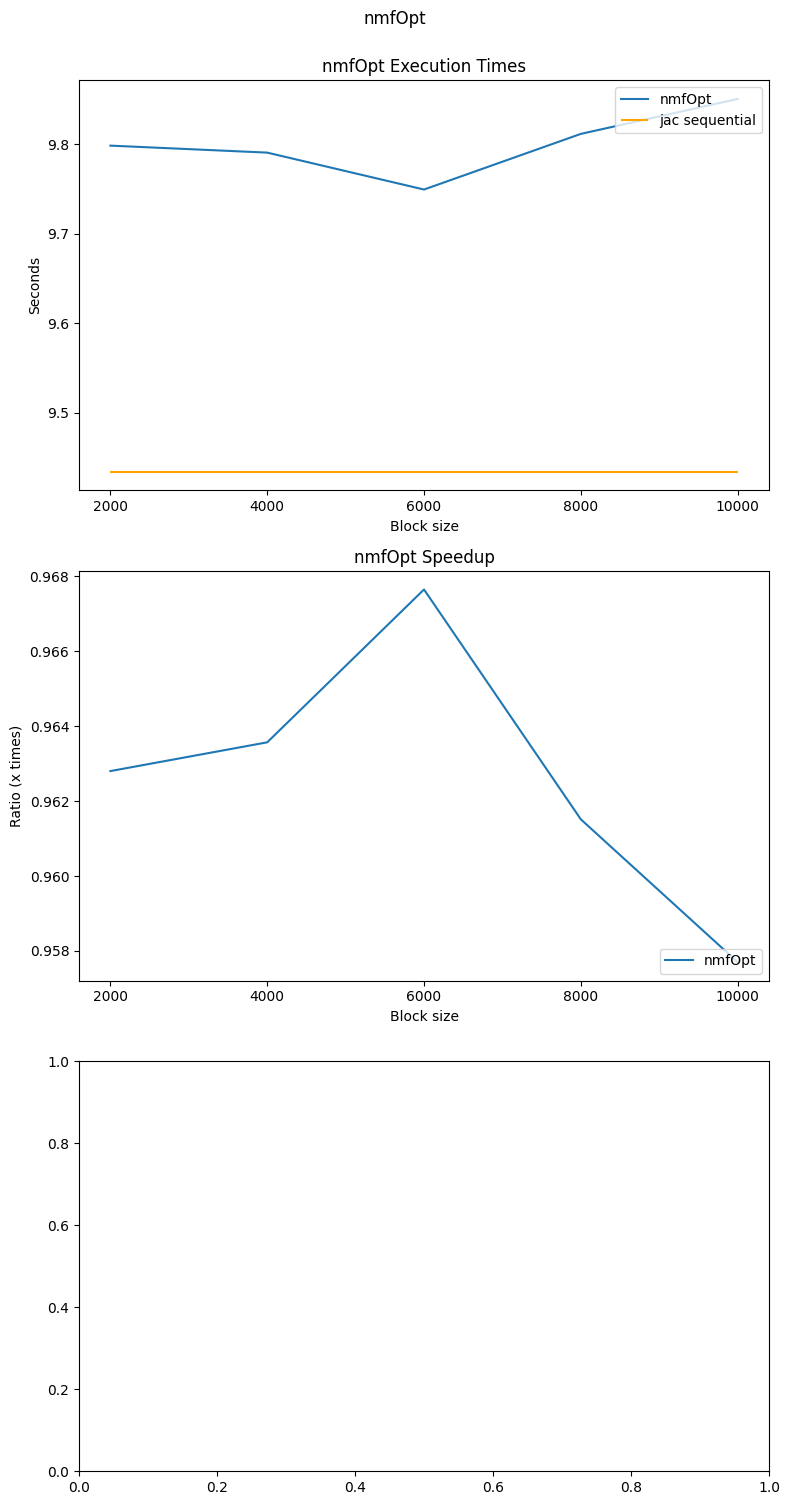

In [27]:
plot_times(adjusted_data_nmfOpt, 'nmfOpt', 'nmfOpt.png')

In [68]:
data_nmfPar = pandas.read_csv('results_nmfPar.csv', delimiter=',', decimal='.')
data_nmfPar

,program,data_set,n,i,t,num_threads,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
0,nmf,./test_data/small_data.dat,3,10000,1,1,0.539063,0.530293,0.538470,0.539602,0.539073,0.540409,0.535833
1,nmfPar,./test_data/small_data.dat,3,10000,1,1,0.467834,0.466783,0.470926,0.469701,0.470110,0.469331,0.471778
2,nmfPar,./test_data/small_data.dat,3,10000,1,2,0.369462,0.406339,0.414653,0.374203,0.371437,0.362249,0.373776
3,nmfPar,./test_data/small_data.dat,3,10000,1,3,0.247670,0.265628,0.277338,0.276081,0.269528,0.274025,0.273376
4,nmfPar,./test_data/small_data.dat,3,10000,1,4,0.281410,0.259314,0.305913,0.260079,0.274655,0.259193,0.295095
5,nmfPar,./test_data/small_data.dat,3,10000,1,5,0.289861,0.291521,0.319581,0.238206,0.290719,0.282542,0.295433
6,nmfPar,./test_data/small_data.dat,3,10000,1,6,0.284559,0.318163,0.287948,0.314914,0.286189,0.317706,0.284646
7,nmfPar,./test_data/small_data.dat,3,10000,1,7,0.317453,0.301261,0.344294,0.320543,0.326978,0.299441,0.279701
8,nmfPar,./test_data/small_data.dat,3,10000,1,8,0.330286,0.268090,0.344559,0.300924,0.330209,0.318222,0.315421
9,nmf,./test_data/med_data.dat,6,10000,5,1,9.425645,9.415005,9.423831,9.312160,9.408878,9.410947,9.278698


In [69]:
import math

def calc_mean_and_variance2(df):
    df_cols = ['iter_0', 'iter_1', 'iter_2', 'iter_3', 'iter_4', 'iter_5', 'iter_6']
    df_variance_cols = ['iter_0_variance', 'iter_1_variance', 'iter_2_variance', 'iter_3_variance', \
                        'iter_4_variance', 'iter_5_variance', 'iter_6_variance']

    df['adjusted_mean'] = 0
    df[df_variance_cols] = 0

    for index, row in df.iterrows():
        adjusted_mean = (row[df_cols].sum() - row[df_cols].min() - row[df_cols].max()) / (len(row[df_cols]) - 2)
        df.at[index, 'adjusted_mean'] = adjusted_mean
        
        if index % 9 != 0:
            speedup = df.at[int(index / 9)*9, 'adjusted_mean'] / adjusted_mean
        else:
            speedup = 1
            
        df.at[index, 'speedup'] = speedup
        
        efficiency = speedup / df.at[index, 'num_threads']
        df.at[index, 'efficiency'] = efficiency

    return df



In [85]:
# desired_cols = ['program', 'data_set', 'n', 'i', 't', 'num_threads', 'iter_0', 'iter_1', 'iter_2', \
#                 'iter_3', 'iter_4', 'iter_5', 'iter_6', 'adjusted_mean', 'speedup', 'efficiency']
desired_cols = ['program', 'data_set', 'n', 'i', 't', 'num_threads', 'adjusted_mean', 'speedup', 'efficiency']

In [86]:
from IPython.display import display

def print_table(data):
    display(data[desired_cols].style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
            .set_properties(**{'text-align': 'center'}).hide(axis='index'))

In [87]:
adjusted_data_nmfPar = calc_mean_and_variance2(data_nmfPar)
print_table(adjusted_data_nmfPar)

program,data_set,n,i,t,num_threads,adjusted_mean,speedup,efficiency
nmf,./test_data/small_data.dat,3,10000,1,1,0.538408,1.000000,1.000000
nmfPar,./test_data/small_data.dat,3,10000,1,1,0.469580,1.146573,1.146573
nmfPar,./test_data/small_data.dat,3,10000,1,2,0.379043,1.420439,0.710220
nmfPar,./test_data/small_data.dat,3,10000,1,3,0.271728,1.981426,0.660475
nmfPar,./test_data/small_data.dat,3,10000,1,4,0.274111,1.964201,0.491050
nmfPar,./test_data/small_data.dat,3,10000,1,5,0.290015,1.856483,0.371297
nmfPar,./test_data/small_data.dat,3,10000,1,6,0.298281,1.805039,0.300840
nmfPar,./test_data/small_data.dat,3,10000,1,7,0.313135,1.719411,0.245630
nmfPar,./test_data/small_data.dat,3,10000,1,8,0.319012,1.687734,0.210967
nmf,./test_data/med_data.dat,6,10000,5,1,9.394164,1.000000,1.000000


In [83]:
import matplotlib.pyplot as plt

def plot_times2(adjusted_data, fig_title='', fig_file_name='test.png'):
    seq_small_results = adjusted_data[:1]
    par_small_results = adjusted_data[1:9]
    seq_med_results = adjusted_data[9:10]
    par_med_results = adjusted_data[10:18]
    seq_lg_results = adjusted_data[18:19]
    par_lg_results = adjusted_data[19:]

    fig, axs = plt.subplots(3, figsize=(8, 15))
    
    fig.suptitle(fig_title, y=1)
    
    axs[0].plot(par_small_results['num_threads'], par_small_results['adjusted_mean'], label=fig_title + ' small')
    axs[0].plot(par_med_results['num_threads'], par_med_results['adjusted_mean'], label=fig_title + ' medium')
    axs[0].plot(par_lg_results['num_threads'], par_lg_results['adjusted_mean'], label=fig_title + ' large')
    axs[0].hlines(y=seq_small_results['adjusted_mean'], xmin=1, xmax=8, colors='orange', label='nmf small')
    axs[0].hlines(y=seq_med_results['adjusted_mean'], xmin=1, xmax=8, colors='purple', label='nmf medium')
    axs[0].hlines(y=seq_lg_results['adjusted_mean'], xmin=1, xmax=8, colors='yellow', label='nmf large')
    axs[0].set_ylabel('Seconds')
    axs[0].legend(loc='upper right')
    axs[0].set_title(f"{fig_title} Execution Times")
    axs[0].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[0].set_xlabel('Number of threads')
    
    axs[1].plot(par_small_results['num_threads'], par_small_results['speedup'], label=fig_title + ' small') 
    axs[1].plot(par_med_results['num_threads'], par_med_results['speedup'], label=fig_title + ' medium') 
    axs[1].plot(par_lg_results['num_threads'], par_lg_results['speedup'], label=fig_title + ' large') 
    axs[1].legend(loc='lower right')
    axs[1].set_ylabel('Ratio (x times)')
    axs[1].set_title(f"{fig_title} Speedup")
    axs[1].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[1].set_xlabel('Number of threads')
    
    axs[2].plot(par_small_results['num_threads'], par_small_results['efficiency'], label=fig_title + ' small')  
    axs[2].plot(par_med_results['num_threads'], par_med_results['efficiency'], label=fig_title + ' medium')  
    axs[2].plot(par_lg_results['num_threads'], par_lg_results['efficiency'], label=fig_title + ' large')  
    axs[2].legend(loc='lower left')
    axs[2].set_ylabel('Ratio')
    axs[2].set_title(f"{fig_title} Efficiency")
    axs[2].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[2].set_xlabel('Number of threads')
    
    
    fig.tight_layout()
    
    fig.savefig(fig_file_name, bbox_inches='tight')

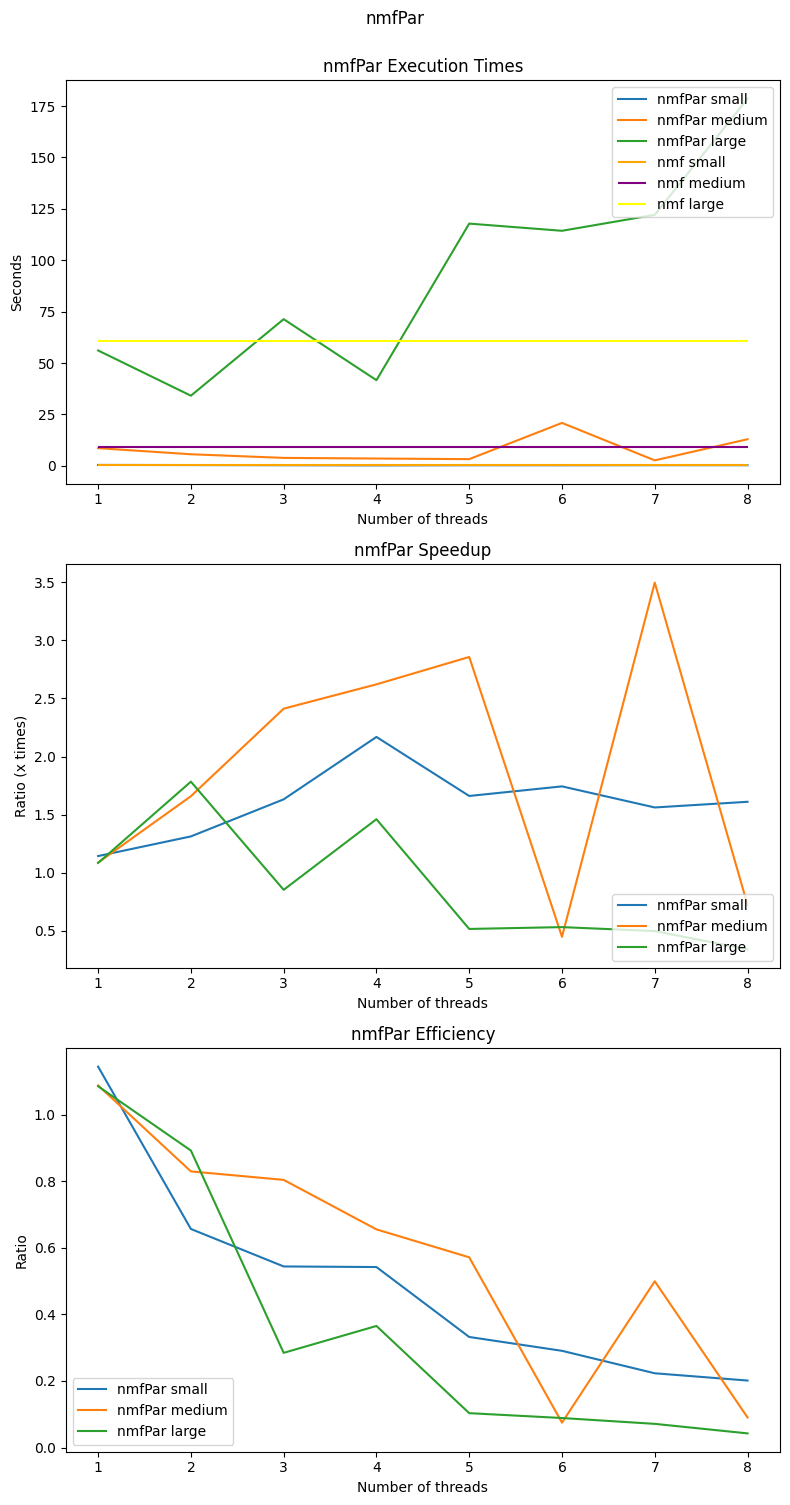

In [84]:
plot_times2(adjusted_data_nmfPar, 'nmfPar', 'nmfPar.png')

In [141]:
# 1 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.469358, 0.461358, 0.466966, 0.466087, 0.465197, 0.461689, 0.464283,
# (base) denver:~/CS575/NMF$ ./test.sh 3 10000 ./test_data/small_data.dat 1 1 10000 nmfPar
# 1 threads for nmfPar -N 3 -I 10000 -T 1 -B 10000 ./test_data/small_data.dat
# 0.467310, 0.461882, 0.462999, 0.464838, 0.461975, 0.464308, 0.464366,
# 2 threads for nmfPar -N 3 -I 10000 -T 1 -B 10000 ./test_data/small_data.dat
# 0.273911, 0.355502, 0.378805, 0.456834, 0.379419, 0.421706, 0.314532,
# 3 threads for nmfPar -N 3 -I 10000 -T 1 -B 10000 ./test_data/small_data.dat
# 0.257261, 0.314322, 0.350483, 0.328163, 0.173442, 0.308511, 0.347365,
# 4 threads for nmfPar -N 3 -I 10000 -T 1 -B 10000 ./test_data/small_data.dat
# 0.302140, 0.299616, 0.317576, 0.295622, 0.305130, 0.264368, 0.303575,
# 5 threads for nmfPar -N 3 -I 10000 -T 1 -B 10000 ./test_data/small_data.dat
# 0.205365, 0.317785, 0.298841, 0.309472, 0.301221, 0.317912, 0.309010,
# 6 threads for nmfPar -N 3 -I 10000 -T 1 -B 10000 ./test_data/small_data.dat
# 0.320310, 0.329265, 0.324173, 0.173808, 0.291335, 0.317615, 0.320860,
# 7 threads for nmfPar -N 3 -I 10000 -T 1 -B 10000 ./test_data/small_data.dat
# 0.309361, 0.320158, 0.317193, 0.326104, 0.325944, 0.309290, 0.315788,
# 8 threads for nmfPar -N 3 -I 10000 -T 1 -B 10000 ./test_data/small_data.dat
# 0.320117, 0.378715, 0.289384, 0.343657, 0.314894, 0.306692, 0.318668,

# load data into arrays based on number of threads
# 1 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/medium_data.dat
small_thread_1 = [0.469358, 0.461358, 0.466966, 0.466087, 0.465197, 0.461689, 0.464283]
small_thread_2 = [0.273911, 0.355502, 0.378805, 0.456834, 0.379419, 0.421706, 0.314532]
small_thread_3 = [0.257261, 0.314322, 0.350483, 0.328163, 0.173442, 0.308511, 0.347365]
small_thread_4 = [0.302140, 0.299616, 0.317576, 0.295622, 0.305130, 0.264368, 0.303575]
small_thread_5 = [0.205365, 0.317785, 0.298841, 0.309472, 0.301221, 0.317912, 0.309010]
small_thread_6 = [0.320310, 0.329265, 0.324173, 0.173808, 0.291335, 0.317615, 0.320860]
small_thread_7 = [0.309361, 0.320158, 0.317193, 0.326104, 0.325944, 0.309290, 0.315788]
small_thread_8 = [0.320117, 0.378715, 0.289384, 0.343657, 0.314894, 0.306692, 0.318668]

seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]

# create a list of the small_thread arrays
small_threads = [small_thread_1, small_thread_2, small_thread_3, small_thread_4, small_thread_5, small_thread_6, small_thread_7, small_thread_8]

# call speedup method to calculate speedup for each thread
df_small = calc_speedup(seq, small_threads)

df_small



Sequential Execution time average:  0.5419072


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.00181,0.465,1.165,1.165
1,2,0.03500,0.370,1.465,0.732
2,3,0.03007,0.311,1.742,0.581
3,4,0.00333,0.301,1.800,0.450
4,5,0.00672,0.307,1.765,0.353
5,6,0.01195,0.315,1.720,0.287
6,7,0.00543,0.318,1.704,0.243
7,8,0.01234,0.321,1.688,0.211


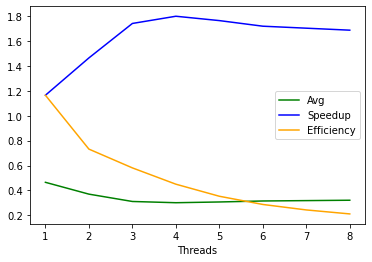

In [142]:
# plot the speedup for the small data set
plot_speedup(df_small)

In [143]:
# 1 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 8.601940, 8.483056, 8.638938, 8.528466, 8.486637, 8.606999, 8.512841,
# 2 threads for nmfPar -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 5.870709, 5.576255, 5.644758, 5.737341, 5.848468, 5.575708, 5.636205,
# 3 threads for nmfPar -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 3.710533, 3.983835, 3.657712, 4.074849, 3.775807, 3.763663, 3.733229,
# 4 threads for nmfPar -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 3.456613, 3.652394, 3.382862, 3.161149, 3.800312, 3.238194, 3.616206,
# 5 threads for nmfPar -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 3.380727, 3.375372, 3.453738, 3.410493, 3.367762, 3.294361, 3.430720,
# 6 threads for nmfPar -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 2.598713, 2.499456, 2.503063, 2.693472, 2.486435, 2.751318, 2.702971,
# 7 threads for nmfPar -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 2.425450, 2.880328, 2.633770, 2.589878, 2.642531, 2.366323, 2.692747,
# 8 threads for nmfPar -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 2.597148, 2.599033, 2.658040, 2.700769, 2.663636, 2.762563, 2.571986,

# load data into arrays based on number of threads
# 1 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
med_thread_1 = [8.601940, 8.483056, 8.638938, 8.528466, 8.486637, 8.606999, 8.512841]
med_thread_2 = [5.870709, 5.576255, 5.644758, 5.737341, 5.848468, 5.575708, 5.636205]
med_thread_3 = [3.710533, 3.983835, 3.657712, 4.074849, 3.775807, 3.763663, 3.733229]
med_thread_4 = [3.456613, 3.652394, 3.382862, 3.161149, 3.800312, 3.238194, 3.616206]
med_thread_5 = [3.380727, 3.375372, 3.453738, 3.410493, 3.367762, 3.294361, 3.430720]
med_thread_6 = [2.598713, 2.499456, 2.503063, 2.693472, 2.486435, 2.751318, 2.702971]
med_thread_7 = [2.425450, 2.880328, 2.633770, 2.589878, 2.642531, 2.366323, 2.692747]
med_thread_8 = [2.597148, 2.599033, 2.658040, 2.700769, 2.663636, 2.762563, 2.571986]

seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]

# create a list of the med_thread arrays
med_threads = [med_thread_1, med_thread_2, med_thread_3, med_thread_4, med_thread_5, med_thread_6, med_thread_7, med_thread_8]

# call speedup method to calculate speedup for each thread
df_med = calc_speedup(seq, med_threads)

df_med





Sequential Execution time average:  9.4422076


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.04852,8.547,1.105,1.105
1,2,0.09510,5.689,1.660,0.830
2,3,0.09793,3.793,2.489,0.830
3,4,0.15241,3.469,2.722,0.680
4,5,0.02378,3.393,2.783,0.557
5,6,0.08814,2.600,3.632,0.605
6,7,0.09173,2.597,3.636,0.519
7,8,0.04006,2.644,3.571,0.446


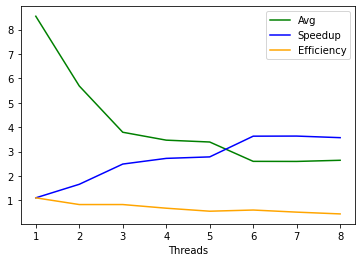

In [144]:
# plot the speedup for the med data set
plot_speedup(df_med)

In [145]:
# 1 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 57.509777, 56.962362, 55.776918, 55.694485, 55.472652, 55.783527, 56.057337,
# 2 threads for nmfPar -N 10 -I 10000 -T 15 -B 10000 ./test_data/large_data.dat
# 33.907045, 35.003522, 34.337271, 33.996812, 33.550079, 34.901964, 35.253560,
# 3 threads for nmfPar -N 10 -I 10000 -T 15 -B 10000 ./test_data/large_data.dat
# 24.946283, 23.908592, 24.195466, 24.215600, 25.087447, 25.430383, 25.424297,
# 4 threads for nmfPar -N 10 -I 10000 -T 15 -B 10000 ./test_data/large_data.dat
# 20.058474, 18.888086, 19.319388, 18.364661, 19.290699, 18.881976, 19.714550,
# 5 threads for nmfPar -N 10 -I 10000 -T 15 -B 10000 ./test_data/large_data.dat
# 16.424864, 16.814661, 15.400160, 15.805944, 15.960626, 15.433609, 16.320457,
# 6 threads for nmfPar -N 10 -I 10000 -T 15 -B 10000 ./test_data/large_data.dat
# 16.370954, 16.176130, 14.165164, 16.131220, 15.337865, 15.385197, 15.666010,
# 7 threads for nmfPar -N 10 -I 10000 -T 15 -B 10000 ./test_data/large_data.dat
# 15.588903, 14.098645, 14.906016, 14.472544, 15.462098, 15.146021, 15.509928,
# 8 threads for nmfPar -N 10 -I 10000 -T 15 -B 10000 ./test_data/large_data.dat
# 13.803959, 15.287172, 15.474498, 14.905076, 13.822916, 14.998416, 15.268944,

# load data into arrays based on number of threads
# 1 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
large_thread_1 = [57.509777, 56.962362, 55.776918, 55.694485, 55.472652, 55.783527, 56.057337]
large_thread_2 = [33.907045, 35.003522, 34.337271, 33.996812, 33.550079, 34.901964, 35.253560]
large_thread_3 = [24.946283, 23.908592, 24.195466, 24.215600, 25.087447, 25.430383, 25.424297]
large_thread_4 = [20.058474, 18.888086, 19.319388, 18.364661, 19.290699, 18.881976, 19.714550]
large_thread_5 = [16.424864, 16.814661, 15.400160, 15.805944, 15.960626, 15.433609, 16.320457]
large_thread_6 = [16.370954, 16.176130, 14.165164, 16.131220, 15.337865, 15.385197, 15.666010]
large_thread_7 = [15.588903, 14.098645, 14.906016, 14.472544, 15.462098, 15.146021, 15.509928]
large_thread_8 = [13.803959, 15.287172, 15.474498, 14.905076, 13.822916, 14.998416, 15.268944]

seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]

# create a list of the large_thread arrays
large_threads = [large_thread_1, large_thread_2, large_thread_3, large_thread_4, large_thread_5, large_thread_6, large_thread_7, large_thread_8]

# call speedup method to calculate speedup for each thread
df_large = calc_speedup(seq, large_threads)

df_large


Sequential Execution time average:  64.0224332


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.46996,56.055,1.142,1.142
1,2,0.45198,34.429,1.860,0.930
2,3,0.48935,24.774,2.584,0.861
3,4,0.31109,19.219,3.331,0.833
4,5,0.35850,15.989,4.004,0.801
5,6,0.35674,15.739,4.068,0.678
6,7,0.38278,15.099,4.240,0.606
7,8,0.53784,14.857,4.309,0.539


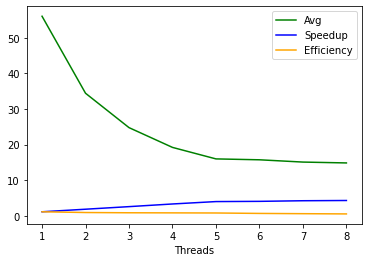

In [146]:
# plot the speedup for the large data set
plot_speedup(df_large)

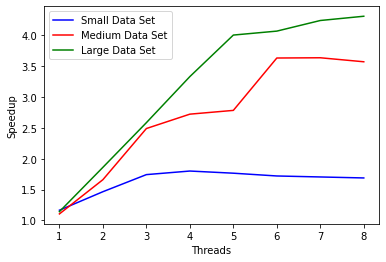

In [147]:
# plot speedup for the 3 data sets on a single plot
fig, ax = plt.subplots()

df_small.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax, label = 'Small Data Set')
df_med.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'red', ax = ax, label = 'Medium Data Set')
df_large.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Speedup
plt.ylabel('Speedup')
plt.show()

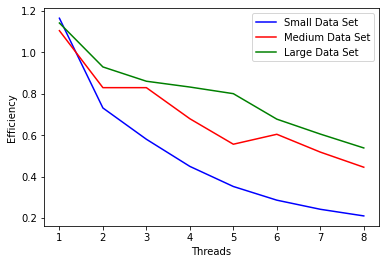

In [148]:
# plot efficiency for both data sets on a single plot
fig, ax = plt.subplots()

df_small.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'blue', ax = ax, label = 'Small Data Set')
df_med.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'red', ax = ax, label = 'Medium Data Set')
df_large.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Efficiency
plt.ylabel('Efficiency')
plt.show()

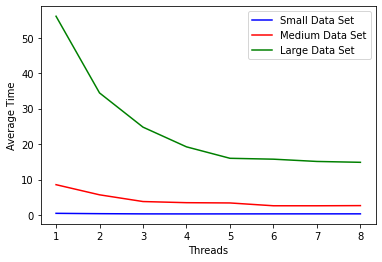

In [97]:
# plot Avg time for both data sets on a single plot
fig, ax = plt.subplots()

df_small.plot(kind = 'line',x = 'Threads', y = 'Avg', color = 'blue', ax = ax, label = 'Small Data Set')
df_med.plot(kind = 'line',x = 'Threads', y = 'Avg', color = 'red', ax = ax, label = 'Medium Data Set')
df_large.plot(kind = 'line',x = 'Threads', y = 'Avg', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Avg
plt.ylabel('Average Time')
plt.show()

In [ ]:
# Below are the test runs for nmfOptPar from Karen

In [149]:
# (base) denver:~/CS575/NMF$ ./test.sh 3 10000 ./test_data/small_data.dat 1 1 50 nmfOptPar
# 1 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.473027, 0.469190, 0.474857, 0.470404, 0.476208, 0.470956, 0.470836,
# 2 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.404884, 0.442648, 0.421824, 0.429188, 0.422091, 0.426283, 0.419216,
# 3 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.379768, 0.343440, 0.350297, 0.346856, 0.372859, 0.354118, 0.353140,
# 4 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.369718, 0.359942, 0.382948, 0.360246, 0.365979, 0.359217, 0.371587,
# 5 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.350885, 0.334313, 0.338852, 0.359696, 0.345433, 0.338438, 0.371694,
# 6 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.367193, 0.341101, 0.361324, 0.349142, 0.348052, 0.366893, 0.360184,
# 7 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.348019, 0.349420, 0.351819, 0.357441, 0.345143, 0.340559, 0.346910,
# 8 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.597759, 0.392968, 0.381030, 0.603927, 0.599007, 0.592791, 0.386289,

# load data into arrays based on number of threads
# 1 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 250 ./test_data/small_data.dat
small_thread_1 = [0.473027, 0.469190, 0.474857, 0.470404, 0.476208, 0.470956, 0.470836]
small_thread_2 = [0.404884, 0.442648, 0.421824, 0.429188, 0.422091, 0.426283, 0.419216]
small_thread_3 = [0.379768, 0.343440, 0.350297, 0.346856, 0.372859, 0.354118, 0.353140]
small_thread_4 = [0.369718, 0.359942, 0.382948, 0.360246, 0.365979, 0.359217, 0.371587]
small_thread_5 = [0.350885, 0.334313, 0.338852, 0.359696, 0.345433, 0.338438, 0.371694]
small_thread_6 = [0.367193, 0.341101, 0.361324, 0.349142, 0.348052, 0.366893, 0.360184]  
small_thread_7 = [0.348019, 0.349420, 0.351819, 0.357441, 0.345143, 0.340559, 0.346910]
small_thread_8 = [0.597759, 0.392968, 0.381030, 0.603927, 0.599007, 0.592791, 0.386289]

seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]

# create a list of the small_thread arrays
small_threads = [small_thread_1, small_thread_2, small_thread_3, small_thread_4, small_thread_5, small_thread_6, small_thread_7, small_thread_8]

# call speedup method to calculate speedup for each thread
df_opt_par_small = calc_speedup(seq, small_threads)

df_opt_par_small

Sequential Execution time average:  0.5419072


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.00169,0.472,1.148,1.148
1,2,0.00355,0.424,1.278,0.639
2,3,0.00906,0.355,1.526,0.509
3,4,0.00477,0.365,1.485,0.371
4,5,0.00797,0.347,1.562,0.312
5,6,0.00733,0.357,1.518,0.253
6,7,0.00226,0.348,1.557,0.222
7,8,0.10140,0.514,1.054,0.132


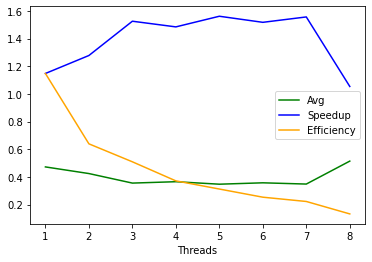

In [150]:
# plot the speedup for the small data set
plot_speedup(df_opt_par_small)

In [151]:
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 1 500 nmfOptPar
# 1 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 8.524676, 8.459006, 8.638325, 8.638248, 8.497887, 8.510510, 8.481204,
# 2 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 7.237453, 7.119850, 7.152221, 7.037809, 7.388208, 7.369263, 7.250963,
# 3 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 6.034665, 6.639669, 6.019417, 6.024308, 6.450956, 6.258909, 6.422202,
# 4 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.959263, 5.701239, 6.184621, 6.106526, 5.719980, 5.686561, 5.925384,
# 5 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.202563, 5.358257, 5.406622, 5.393329, 5.805852, 5.301427, 5.522257,
# 6 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.677002, 5.440500, 5.337732, 5.223539, 5.208664, 5.178352, 5.767380,
# 7 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.385468, 5.541623, 5.378007, 5.314116, 5.402037, 5.484800, 5.453454,
# 8 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 11.737052, 6.121985, 5.954632, 11.672901, 11.825096, 6.051490, 11.755714,

# load data into arrays based on number of threads
# 1 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 250 ./test_data/med_data.dat
med_opt_par_thread_1 = [8.524676, 8.459006, 8.638325, 8.638248, 8.497887, 8.510510, 8.481204]
med_opt_par_thread_2 = [7.237453, 7.119850, 7.152221, 7.037809, 7.388208, 7.369263, 7.250963]
med_opt_par_thread_3 = [6.034665, 6.639669, 6.019417, 6.024308, 6.450956, 6.258909, 6.422202]
med_opt_par_thread_4 = [5.959263, 5.701239, 6.184621, 6.106526, 5.719980, 5.686561, 5.925384]
med_opt_par_thread_5 = [5.202563, 5.358257, 5.406622, 5.393329, 5.805852, 5.301427, 5.522257]
med_opt_par_thread_6 = [5.677002, 5.440500, 5.337732, 5.223539, 5.208664, 5.178352, 5.767380]
med_opt_par_thread_7 = [5.385468, 5.541623, 5.378007, 5.314116, 5.402037, 5.484800, 5.453454]
med_opt_par_thread_8 = [11.737052, 6.121985, 5.954632, 11.672901, 11.825096, 6.051490, 11.755714]

# create a list of the med_thread arrays
med_threads = [med_opt_par_thread_1, med_opt_par_thread_2, med_opt_par_thread_3, med_opt_par_thread_4, med_opt_par_thread_5, med_opt_par_thread_6, med_opt_par_thread_7, med_opt_par_thread_8]

seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]

# call speedup method to calculate speedup for each thread
df_opt_par_med = calc_speedup(seq, med_threads)

df_opt_par_med


Sequential Execution time average:  9.4422076


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.05574,8.531,1.107,1.107
1,2,0.08717,7.226,1.307,0.654
2,3,0.18261,6.238,1.514,0.505
3,4,0.15309,5.882,1.605,0.401
4,5,0.07270,5.396,1.750,0.350
5,6,0.17173,5.377,1.756,0.293
6,7,0.04146,5.421,1.742,0.249
7,8,2.76088,9.468,0.997,0.125


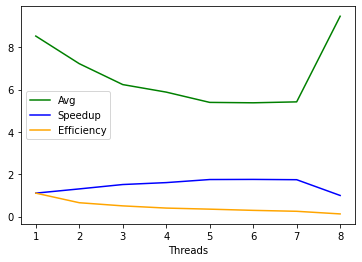

In [152]:
# plot the speedup for the med data set
plot_speedup(df_opt_par_med)

In [153]:
# (base) denver:~/CS575/NMF$ ./test.sh 10 10000 ./test_data/large_data.dat 15 1 250 nmfOptPar
# 1 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 56.261389, 56.086638, 58.436587, 57.052626, 55.979562, 56.119015, 55.975008,
# 2 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 59.371867, 57.028269, 56.419530, 57.171609, 56.335257, 56.593827, 56.408312,
# 3 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 54.670949, 53.814489, 53.236920, 55.179493, 53.627131, 54.192919, 53.267037,
# 4 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 54.155870, 53.513522, 54.114519, 53.965311, 52.672863, 53.001031, 53.366085,
# 5 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 53.160639, 54.601072, 52.574967, 54.521152, 54.796064, 53.263060, 53.666273,
# 6 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 52.877795, 54.297767, 52.793339, 54.737404, 54.785508, 54.284343, 53.776155,
# 7 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 55.215387, 54.859139, 54.164717, 54.418353, 54.788926, 54.051724, 53.760937,
# 8 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 59.235258, 59.307238, 54.494434, 58.839691, 59.125557, 56.827938, 59.313842,

# load data into arrays based on number of threads
# 1 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat

large_opt_par_thread_1 = [56.261389, 56.086638, 58.436587, 57.052626, 55.979562, 56.119015, 55.975008]
large_opt_par_thread_2 = [59.371867, 57.028269, 56.419530, 57.171609, 56.335257, 56.593827, 56.408312]
large_opt_par_thread_3 = [54.670949, 53.814489, 53.236920, 55.179493, 53.627131, 54.192919, 53.267037]
large_opt_par_thread_4 = [54.155870, 53.513522, 54.114519, 53.965311, 52.672863, 53.001031, 53.366085]
large_opt_par_thread_5 = [53.160639, 54.601072, 52.574967, 54.521152, 54.796064, 53.263060, 53.666273]
large_opt_par_thread_6 = [52.877795, 54.297767, 52.793339, 54.737404, 54.785508, 54.284343, 53.776155]
large_opt_par_thread_7 = [55.215387, 54.859139, 54.164717, 54.418353, 54.788926, 54.051724, 53.760937]
large_opt_par_thread_8 = [59.235258, 59.307238, 54.494434, 58.839691, 59.125557, 56.827938, 59.313842]

# create a list of the large_thread arrays
large_threads = [large_opt_par_thread_1, large_opt_par_thread_2, large_opt_par_thread_3, large_opt_par_thread_4, large_opt_par_thread_5, large_opt_par_thread_6, large_opt_par_thread_7, large_opt_par_thread_8]

seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]

# call speedup method to calculate speedup for each thread
df_opt_par_large = calc_speedup(seq, large_threads)

df_opt_par_large


Sequential Execution time average:  64.0224332


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.38701,56.300,1.137,1.137
1,2,0.31693,56.724,1.129,0.564
2,3,0.48198,53.915,1.187,0.396
3,4,0.40468,53.592,1.195,0.299
4,5,0.61119,53.842,1.189,0.238
5,6,0.63602,53.995,1.186,0.198
6,7,0.32344,54.457,1.176,0.168
7,8,0.93328,58.667,1.091,0.136


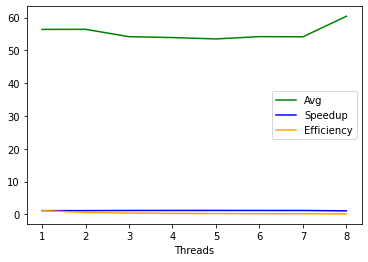

In [105]:
# plot the speedup for the large data set
plot_speedup(df_opt_par_large)

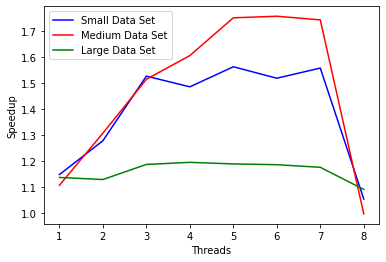

In [154]:
# plot speedup for the 3 data sets on a single plot
fig, ax = plt.subplots()

df_opt_par_small.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax, label = 'Small Data Set')
df_opt_par_med.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'red', ax = ax, label = 'Medium Data Set')
df_opt_par_large.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Speedup
plt.ylabel('Speedup')
plt.show()

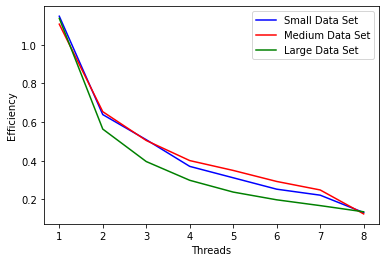

In [156]:
# plot efficiency for the 3 data sets on a single plot
fig, ax = plt.subplots()

df_opt_par_small.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'blue', ax = ax, label = 'Small Data Set')
df_opt_par_med.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'red', ax = ax, label = 'Medium Data Set')
df_opt_par_large.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Efficiency
plt.ylabel('Efficiency')
plt.show()

In [ ]:
# Now for the python runs - then a full compare

Python small average:  0.4910113334655762
Python medium average:  3.535957956314087
Python large average:  16.716882371902464


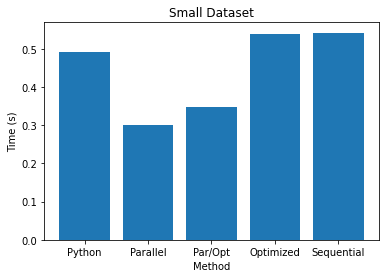

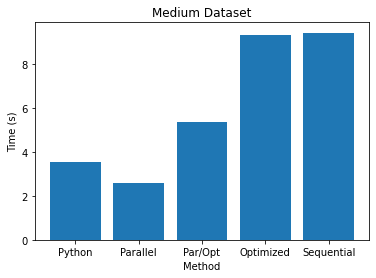

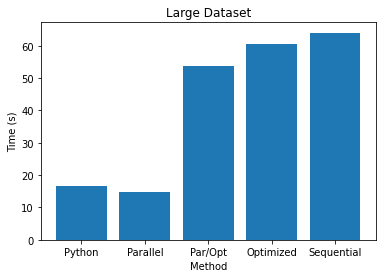

In [157]:
# running python results for the small dataset
py_small = [0.5197911262512207, 0.5137181282043457, 0.48627352714538574, 0.48632144927978516, 0.48370981216430664, 0.4843480587005615, 0.48439550399780273]
py_med = [3.4942641258239746, 3.6299102306365967, 3.503089189529419, 3.5162973403930664, 3.6888787746429443, 3.517646312713623, 3.5128467082977295]
py_large = [17.66326594352722, 16.709167957305908, 16.58553910255432, 16.76421284675598, 16.728759765625, 16.628264904022217, 16.754006385803223]

# find the average of each array using the avg method
py_small_avg = avg(py_small)
py_med_avg = avg(py_med)
py_large_avg = avg(py_large)

# print the averages
print("Python small average: ", py_small_avg)
print("Python medium average: ", py_med_avg)
print("Python large average: ", py_large_avg)


small_seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
med_seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
large_seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]
# find the average of each array using the avg method
small_seq_avg = avg(small_seq)
med_seq_avg = avg(med_seq)
large_seq_avg = avg(large_seq)

small_opt_best = [0.541280, 0.538336, 0.536130, 0.545493, 0.538739, 0.535981, 0.535986] # block size of 50
med_opt_best = [9.436719, 9.219187, 9.301371, 9.387757, 9.340876, 9.539863, 9.269762] # block size of 500
large_opt_best = [60.179979, 59.891246, 60.391118, 60.378669, 61.319627, 60.317667, 62.100910] #block size of 250

# find the average of each array using the avg method
small_opt_best_avg = avg(small_opt_best)
med_opt_best_avg = avg(med_opt_best)
large_opt_best_avg = avg(large_opt_best)

small_par = [0.302140, 0.299616, 0.317576, 0.295622, 0.305130, 0.264368, 0.303575]
med_par = [2.425450, 2.880328, 2.633770, 2.589878, 2.642531, 2.366323, 2.692747]
large_par = [13.803959, 15.287172, 15.474498, 14.905076, 13.822916, 14.998416, 15.268944]
# find the average of each array using the avg method
small_par_avg = avg(small_par)
med_par_avg = avg(med_par)
large_par_avg = avg(large_par)

small_opt_par = [0.350885, 0.334313, 0.338852, 0.359696, 0.345433, 0.338438, 0.371694] # 5 threads
med_opt_par = [5.677002, 5.440500, 5.337732, 5.223539, 5.208664, 5.178352, 5.767380] # 6 threads
large_opt_par = [54.155870, 53.513522, 54.114519, 53.965311, 52.672863, 53.001031, 53.366085] # 4 threads

# find the average of each array using the avg method
small_opt_par_avg = avg(small_opt_par)
med_opt_par_avg = avg(med_opt_par)
large_opt_par_avg = avg(large_opt_par)

# plot a bar chart for the small dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3, 4, 5], [py_small_avg, small_par_avg, small_opt_par_avg, small_opt_best_avg, small_seq_avg], tick_label=['Python', 'Parallel', 'Par/Opt', 'Optimized', 'Sequential'])
plt.title('Small Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()

# plot a bar chart for the medium dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3, 4, 5], [py_med_avg, med_par_avg, med_opt_par_avg, med_opt_best_avg, med_seq_avg], tick_label=['Python', 'Parallel', 'Par/Opt', 'Optimized', 'Sequential'])
plt.title('Medium Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()

# plot a bar chart for the large dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3, 4, 5], [py_large_avg, large_par_avg, large_opt_par_avg, large_opt_best_avg, large_seq_avg], tick_label=['Python', 'Parallel', 'Par/Opt', 'Optimized', 'Sequential'])
plt.title('Large Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()


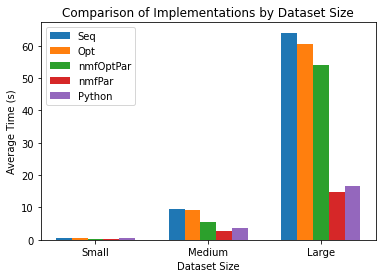

In [116]:
# Averages for each method and dataset size
data = {
    'Seq': [small_seq_avg, med_seq_avg, large_seq_avg],
    'Opt': [small_opt_best_avg, med_opt_best_avg, large_opt_best_avg],
    'nmfOptPar' : [small_opt_par_avg, med_opt_par_avg, large_opt_par_avg],
    'nmfPar': [small_par_avg, med_par_avg, large_par_avg],
    'Python': [py_small_avg, py_med_avg, py_large_avg]
}

# X-axis labels
dataset_sizes = ['Small', 'Medium', 'Large']

# Number of methods and dataset sizes
num_methods = len(data)
num_dataset_sizes = len(dataset_sizes)

# Bar width and positions
bar_width = 0.14
bar_positions = np.arange(num_dataset_sizes)

# Plot bars for each method
fig, ax = plt.subplots()
for idx, (method, averages) in enumerate(data.items()):
    ax.bar(bar_positions + idx * bar_width, averages, bar_width, label=method)

# Set X-axis ticks and labels
ax.set_xticks(bar_positions + (num_methods - 1) * bar_width / 2)
ax.set_xticklabels(dataset_sizes)

# Set axis labels and title
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Average Time (s)')
ax.set_title('Comparison of Implementations by Dataset Size')

# Add legend
ax.legend()

# Show plot
plt.show()

In [88]:
import matplotlib.pyplot as plt

def plot_times2(adjusted_data, fig_title='', fig_file_name='test.png'):
    seq_small_results = adjusted_data[:1]
    par_small_results = adjusted_data[1:9]
    seq_med_results = adjusted_data[9:10]
    par_med_results = adjusted_data[10:18]
    seq_lg_results = adjusted_data[18:19]
    par_lg_results = adjusted_data[19:]

    fig, axs = plt.subplots(3, figsize=(8, 15))
    
    fig.suptitle(fig_title, y=1)
    
    axs[0].plot(par_small_results['num_threads'], par_small_results['adjusted_mean'], label=fig_title + ' small')
    axs[0].plot(par_med_results['num_threads'], par_med_results['adjusted_mean'], label=fig_title + ' medium')
    axs[0].plot(par_lg_results['num_threads'], par_lg_results['adjusted_mean'], label=fig_title + ' large')
    axs[0].hlines(y=seq_small_results['adjusted_mean'], xmin=1, xmax=8, colors='orange', label='nmf small')
    axs[0].hlines(y=seq_med_results['adjusted_mean'], xmin=1, xmax=8, colors='purple', label='nmf medium')
    axs[0].hlines(y=seq_lg_results['adjusted_mean'], xmin=1, xmax=8, colors='yellow', label='nmf large')
    axs[0].set_ylabel('Seconds')
    axs[0].legend(loc='upper right')
    axs[0].set_title(f"{fig_title} Execution Times")
    axs[0].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[0].set_xlabel('Number of threads')
    
    axs[1].plot(par_small_results['num_threads'], par_small_results['speedup'], label=fig_title + ' small') 
    axs[1].plot(par_med_results['num_threads'], par_med_results['speedup'], label=fig_title + ' medium') 
    axs[1].plot(par_lg_results['num_threads'], par_lg_results['speedup'], label=fig_title + ' large') 
    axs[1].legend(loc='lower right')
    axs[1].set_ylabel('Ratio (x times)')
    axs[1].set_title(f"{fig_title} Speedup")
    axs[1].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[1].set_xlabel('Number of threads')
    
    axs[2].plot(par_small_results['num_threads'], par_small_results['efficiency'], label=fig_title + ' small')  
    axs[2].plot(par_med_results['num_threads'], par_med_results['efficiency'], label=fig_title + ' medium')  
    axs[2].plot(par_lg_results['num_threads'], par_lg_results['efficiency'], label=fig_title + ' large')  
    axs[2].legend(loc='lower left')
    axs[2].set_ylabel('Ratio')
    axs[2].set_title(f"{fig_title} Efficiency")
    axs[2].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[2].set_xlabel('Number of threads')
    
    
    fig.tight_layout()
    
    fig.savefig(fig_file_name, bbox_inches='tight')

In [104]:
data_nmfOptPar = pandas.read_csv('results_nmfOptPar.csv', delimiter=',', decimal='.')
data_nmfOptPar

,program,data_set,n,i,t,blk_size,num_threads,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
0,nmf,./test_data/small_data.dat,3,10000,1,50,1,0.536819,0.539107,0.537746,0.535279,0.539563,0.539893,0.538984
1,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,1,0.470900,0.470741,0.469520,0.474536,0.471182,0.470014,0.471579
2,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,2,0.418068,0.466674,0.420997,0.423516,0.421037,0.421305,0.431070
3,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,3,0.388840,0.376224,0.383756,0.391606,0.343057,0.357267,0.370486
4,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,4,0.378306,0.366894,0.406879,0.330646,0.363883,0.386291,0.356601
5,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,5,0.384930,0.353594,0.362801,0.379810,0.359092,0.371555,0.365427
6,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,6,0.373937,0.359150,0.367547,0.390227,0.358795,0.351279,0.392207
7,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,7,0.388244,0.368892,0.420146,0.353870,0.395047,0.388632,0.386942
8,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,8,0.387212,0.359037,0.386867,0.391651,0.398173,0.380689,0.360504
9,nmf,./test_data/med_data.dat,6,10000,5,500,1,9.355644,9.440489,9.407144,9.413807,9.457287,9.275603,9.308050


In [90]:
# desired_cols = ['program', 'num_procs', 'prob_size', 'num_iters', 'buffer_size', 'iter_0', 'iter_1', 'iter_2', \
#                 'iter_3', 'iter_4', 'iter_5', 'iter_6', 'adjusted_mean', 'speedup', 'efficiency']

In [106]:
adjusted_data_nmfOptPar = calc_mean_and_variance2(data_nmfOptPar)
print_table(adjusted_data_nmfOptPar)

program,data_set,n,i,t,blk_size,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,adjusted_mean,speedup,efficiency
nmf,./test_data/small_data.dat,3,10000,1,50,0.536819,0.539107,0.537746,0.535279,0.539563,0.539893,0.538984,0.538444,1.000000,1.000000
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.470900,0.470741,0.469520,0.474536,0.471182,0.470014,0.471579,0.470883,1.143476,1.143476
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.418068,0.466674,0.420997,0.423516,0.421037,0.421305,0.431070,0.423585,1.271159,0.635579
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.388840,0.376224,0.383756,0.391606,0.343057,0.357267,0.370486,0.375315,1.434647,0.478216
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.378306,0.366894,0.406879,0.330646,0.363883,0.386291,0.356601,0.370395,1.453702,0.363425
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.384930,0.353594,0.362801,0.379810,0.359092,0.371555,0.365427,0.367737,1.464209,0.292842
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.373937,0.359150,0.367547,0.390227,0.358795,0.351279,0.392207,0.369931,1.455524,0.242587
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.388244,0.368892,0.420146,0.353870,0.395047,0.388632,0.386942,0.385551,1.396555,0.199508
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.387212,0.359037,0.386867,0.391651,0.398173,0.380689,0.360504,0.381385,1.411813,0.176477
nmf,./test_data/med_data.dat,6,10000,5,500,9.355644,9.440489,9.407144,9.413807,9.457287,9.275603,9.308050,9.385027,1.000000,1.000000


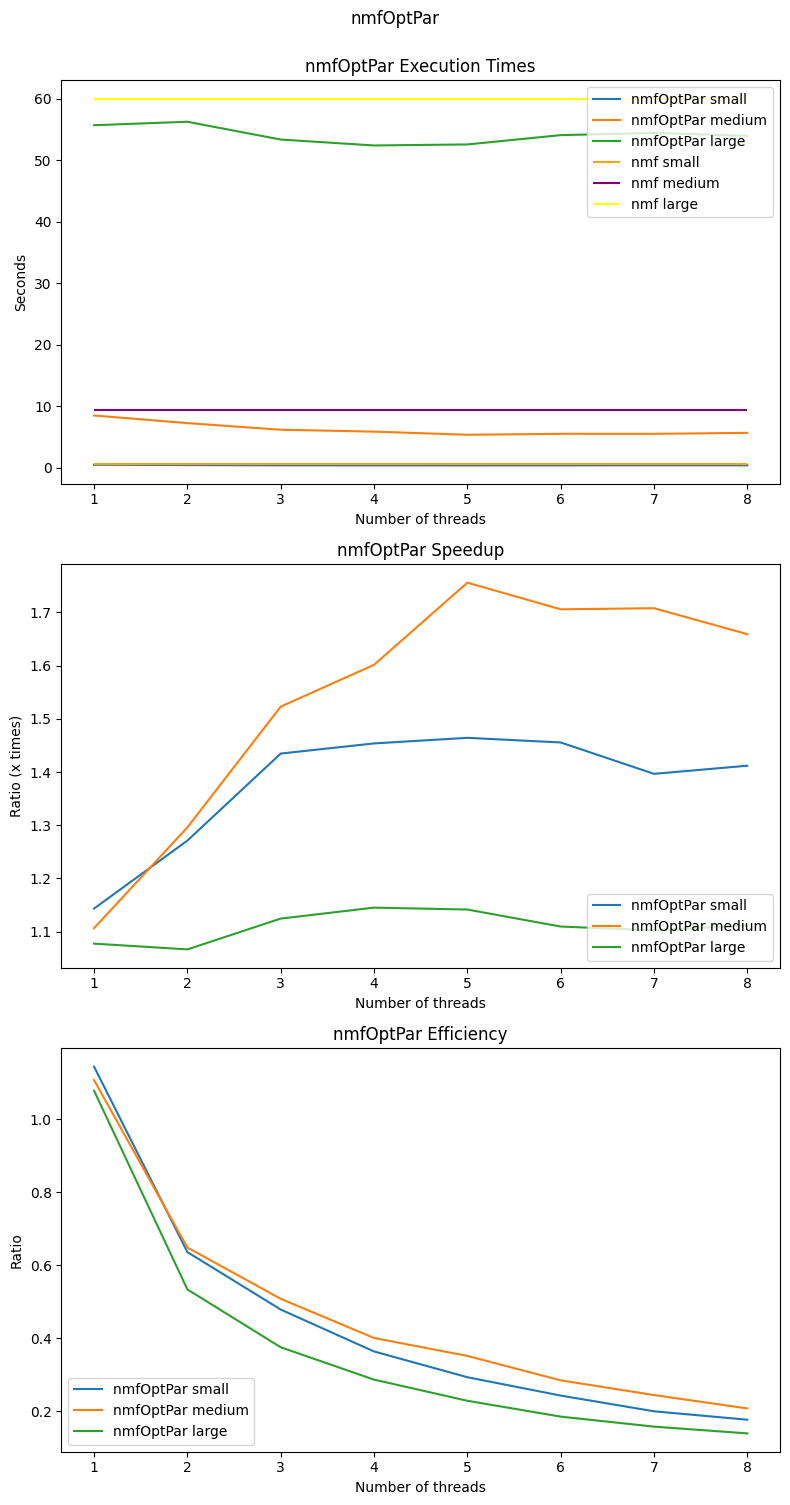

In [107]:
plot_times2(adjusted_data_nmfOptPar, 'nmfOptPar', 'nmfOptPar.png')